In [3]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns

sns.set_style('whitegrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

ModuleNotFoundError: No module named 'imblearn'

# LOADING AND CLEANING DATASET

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
model_data = df.copy(deep=True)

#convert sex to numeric 
model_data.sex = model_data.sex.apply(lambda x: 1 if x == 'male' else 0)
#convert smoker to numeric
model_data.smoker = model_data.smoker.apply(lambda x: 1 if x == 'yes' else 0)

#one hot encode features with multiple categories 
multi_categorical_features = ['region']
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[multi_categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())

model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)

model_data = model_data.round(2)

model_data.head()

,age,sex,bmi,children,smoker,charges,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,19,0,27.90,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.77,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.00,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.70,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.88,0,0,3866.86,0.0,1.0,0.0,0.0


In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
#clean_dataset(model_data)

In [8]:
X = model_data.drop(labels=['charges'],axis=1)
y = model_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LINEAR REGRESSION GRADIENT DESCENT

In [33]:
#Convert df to array
X=X.to_numpy()
y=y.to_numpy()

In [126]:
def run_gradient_descent(X, y, learning_rate=.00038, max_iter=10000):
    w1, w2, w3, w4, w5, w6, w7, w8, w9, w10  = 0.01, .02, .03, .04, .05, .06, .07, .08, .09, .10
    stop_criterion = 0.0000000000000000000000001
    max_iter = 3000
    N = len(y)
    
    #store results
    log = []
    mse = []
    
    while max_iter > 0:
        f = y - (w1*X[:,0] + w2*X[:, 1] + w3*X[:,2] + w4*X[:,3] + w5*X[:,4] + w6*X[:,5] + w7*X[:,6] + w8*X[:,7] + w9*X[:,8] + w10)
        
        #calculate gradient & update weights
        w1 -= learning_rate * (-2 * X[:,0].dot(f).sum()/ N)
        w2 -= learning_rate * (-2 * X[:,1].dot(f).sum()/ N)
        w3 -= learning_rate * (-2 * X[:,2].dot(f).sum()/ N)
        w4 -= learning_rate * (-2 * X[:,3].dot(f).sum()/ N)
        w5 -= learning_rate * (-2 * X[:,4].dot(f).sum()/ N)
        w6 -= learning_rate * (-2 * X[:,5].dot(f).sum()/ N)
        w7 -= learning_rate * (-2 * X[:,6].dot(f).sum()/ N)
        w8 -= learning_rate * (-2 * X[:,7].dot(f).sum()/ N)
        w9 -= learning_rate * (-2 * X[:,8].dot(f).sum()/ N)
        w10 -= learning_rate * (-2 * f.sum() / N)

        #calculate loss
        new_error = mean_squared_error(y, (w1*X[:,0] + w2*X[:, 1] + w3*X[:,2] + w4*X[:,3] + w5*X[:,4] + w6*X[:,5] + w7*X[:,6] + w8*X[:,7] + w9*X[:,8] + w10))

        #store results
        log.append((w1,w2,w3,w4,w5,w6,w7,w8,w9,w10))
        mse.append(new_error)

        if new_error <= stop_criterion:
            break
        max_iter -= 1
    
    return w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, log, mse
w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, log, mse = run_gradient_descent(X, y)

82770723.34677325

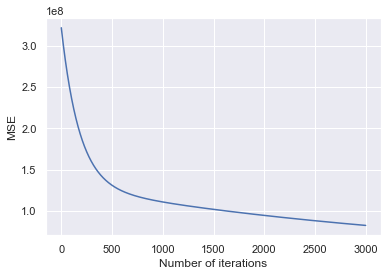

In [127]:
ax = sns.lineplot(x=range(len(mse)),y=mse)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('MSE')
min(mse)

In [52]:
print(w1, w2, w3, w4, w5, w6, w7, w8, w9, w10)

207.2724182290963 128.49986479688638 154.6026791547079 238.38292558620762 2188.396607920996 20.47999039508478 -109.63932663021227 123.36784523774453 -157.15382212068025 -123.14531311806302


In [48]:
#print(mse)

Text(0, 0.5, 'MSE')

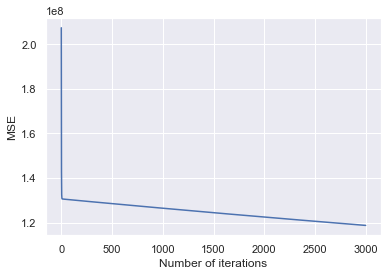

In [16]:
#fig, ax = plt.subplots(figsize=(15,10))

#y_pred = w1*X[:,0] + w2*X[:, 1] + w3*X[:,2] + w4*X[:,3] + w5*X[:,4] + w6*X[:,5] + w7*X[:,6] + w8*X[:,7] + w9*X[:,8] + w10
#sns.scatterplot(x=X, y=y, ax=ax)
#sns.lineplot(x=X, y=y_pred, ax=ax)

# LINEAR REGRESSION SK LEARN

In [22]:
X = model_data.drop(labels=['charges'],axis=1)
y = model_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7423947807540311

In [25]:
reg.score(X_test, y_test)

0.7696124184215904

In [26]:
list(model_data.columns)

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'x0_northeast',
 'x0_northwest',
 'x0_southeast',
 'x0_southwest']

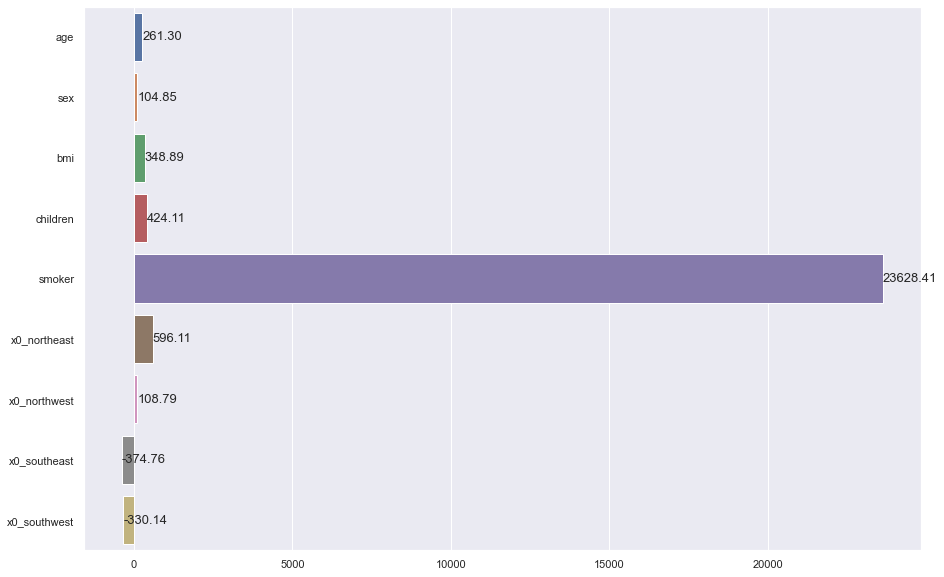

In [27]:
sns.set(font_scale = 1)
reg = LinearRegression().fit(X_train, y_train)
cols = list(X.columns)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=reg.coef_, y=cols)

for p in ax.patches:
     width = p.get_width() # get bar length
     ax.text(width - .5, # set the text at 1 unit right of the bar
               p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
               '{:1.2f}'.format(width), # set variable to display, 2 decimals
               ha = 'left', # horizontal alignment
               va = 'center',fontsize=13) # vertical alignment

# LINEAR REGRESSION OLS

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg =  sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     333.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          6.55e-267
Time:                        12:50:06   Log-Likelihood:                -9492.9
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age            261.2982     14.435     18.102      0.000     232.969     289.627
sex            104.8476    404.889      0.259      0.796    -689.759     899.454
bmi            348.8947     35.286      9.888      0.000     279.645     418.144
children       424.1119    166.973      2.540      0.011      96.423     751.801
smoker        2.363e+04    498.613     47.388      0.000    2.26e+04    2.46e+04
x0_northeast -1.237e+04   1210.573    -10.221      0.000   -1.47e+04   -9997.940
x0_northwest -1.286e+04   1225.262    -10.497      0.000   -1.53e+04   -1.05e+04
x0_southeast -1.334e+04   1323.558    -10.082      0.000   -1.59e+04   -1.07e+04
x0_southwest  -1.33e+04   1268.884    -10.482      0.000   -1.58e+04   -1.08e+04
==============================================================================
Omnibus:                      224.791   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.462
Skew:                           1.270   Prob(JB):                    9.74e-119
Kurtosis:                       5.735   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg =  sm.OLS(y_test, X_test).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          2.26e-121
Time:                        12:50:10   Log-Likelihood:                -4052.1
No. Observations:                 402   AIC:                             8122.
Df Residuals:                     393   BIC:                             8158.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age            245.4216     21.204     11.574      0.000     203.735     287.108
sex           -665.6040    601.866     -1.106      0.269   -1848.883     517.675
bmi            322.8414     49.292      6.550      0.000     225.933     419.750
children       609.0531    248.505      2.451      0.015     120.488    1097.619
smoker         2.45e+04    748.455     32.728      0.000     2.3e+04     2.6e+04
x0_northeast -1.109e+04   1735.561     -6.390      0.000   -1.45e+04   -7677.698
x0_northwest -1.125e+04   1682.329     -6.684      0.000   -1.46e+04   -7937.512
x0_southeast -1.223e+04   1873.941     -6.526      0.000   -1.59e+04   -8545.345
x0_southwest -1.214e+04   1726.915     -7.033      0.000   -1.55e+04   -8749.797
==============================================================================
Omnibus:                       81.847   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.052
Skew:                           1.059   Prob(JB):                     5.90e-39
Kurtosis:                       5.455   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

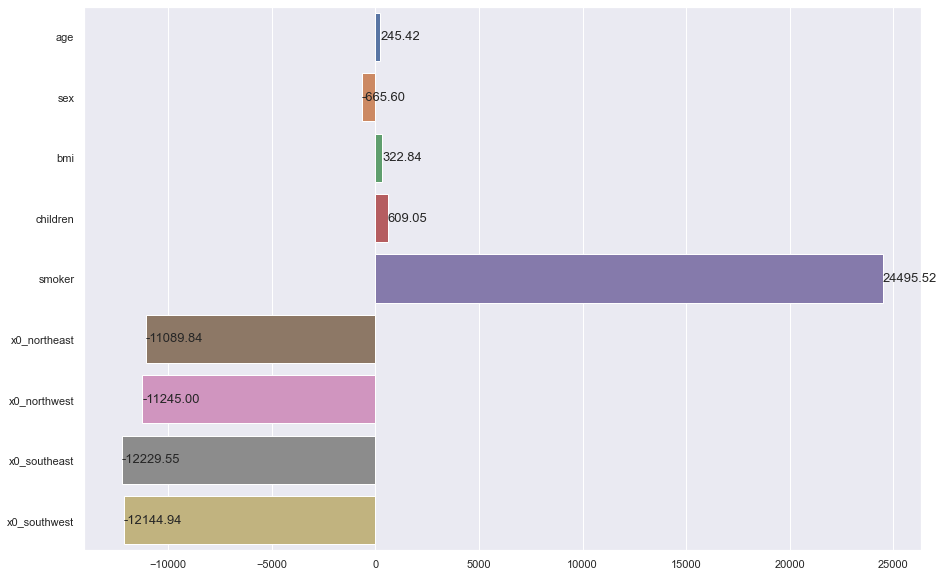

In [30]:
sns.set(font_scale = 1)
reg = sm.OLS(y_test, X_test).fit()
cols = list(X.columns)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=reg.params, y=cols)

for p in ax.patches:
     width = p.get_width() # get bar length
     ax.text(width - .5, # set the text at 1 unit right of the bar
               p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
               '{:1.2f}'.format(width), # set variable to display, 2 decimals
               ha = 'left', # horizontal alignment
               va = 'center',fontsize=13) # vertical alignment